# 1. Importar Bibliotecas

In [1]:
# Importar a biblioteca Pandas, Matplotilib e Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

# 2. Carregar o arquivo para o Colab

In [2]:
# Carregar o arquivo sales_data.csv dentro de uma variável "df"(dataframe) e verificar as colunas e primeiras linhas do dataframe

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_data.csv', sep=";")
df.head()

,order_id,product_name,quantity,unit_price,cliente_id,order_date
0,1,Produto A,3,25,74,01/03/2024
1,2,Produto B,2,30,36,02/03/2024
2,3,Produto C,1,20,12,03/03/2024
3,4,Produto A,4,25,92,04/03/2024
4,5,Produto D,2,40,55,05/03/2024


# 3. Ver mais informações sobre o dataframe

In [3]:
# Agora podemos iniciar a análise exploratória, ver informações sobre os dados, como verificar se existem valores nulos e o tipo de dados das células, usando a função .info no nosso dataframe
# Também vou adicionar o .describe, que trará informações estatísticas que podem ser úteis posteriormente
print("\nInformações do dataframe:")
df.info()

print("\nInformações estatísticas do dataframe:")
df.describe()


Informações do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      100 non-null    int64 
 1   product_name  100 non-null    object
 2   quantity      100 non-null    int64 
 3   unit_price    100 non-null    int64 
 4   cliente_id    100 non-null    int64 
 5   order_date    100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB

Informações estatísticas do dataframe:


,order_id,quantity,unit_price,cliente_id
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2.340000,28.600000,49.120000
std,29.011492,0.976698,7.353965,29.403594
min,1.000000,1.000000,20.000000,1.000000
25%,25.750000,2.000000,23.750000,25.500000
50%,50.500000,2.000000,25.000000,49.500000
75%,75.250000,3.000000,30.000000,76.000000
max,100.000000,4.000000,40.000000,100.000000


# 4. Iniciar a criação de visualizações

Algumas informações importantes que trarão insights seriam vendas totais por mês, ranking de produtos mais vendidos, o faturamento que foi gerado por cada cliente, cliente que tem o maior número de compras

In [4]:
# Vendas totais por mês
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
df['month'] = df['order_date'].dt.to_period('M')
sales_per_month = df.groupby('month')['quantity'].sum()

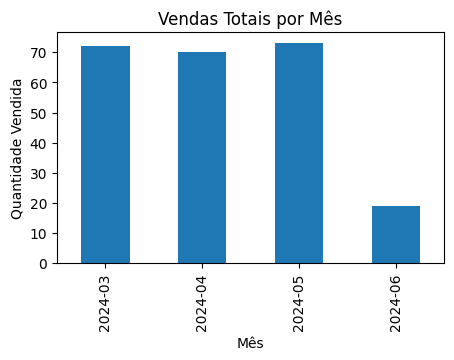

In [5]:
# Usando a biblioteca Matplotlib e seaborn, podemos criar visualizações que facilitam o entendimento
# Abaixo fiz o plot das vendas totais dos 4 meses apresentados
plt.figure(figsize=(5, 3))
sales_per_month.plot(kind='bar')
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.show()

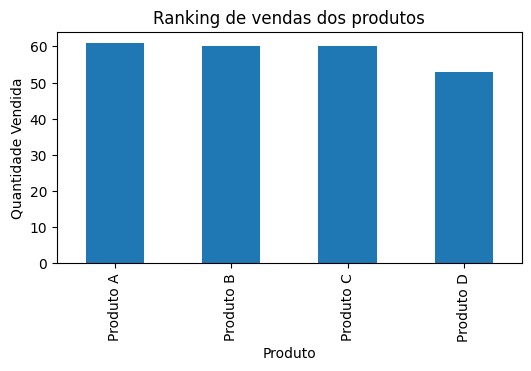

In [6]:
# Como só temos poucos produtos, criei um ranking que mostra quais produtos foram mais vendidos
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(4)

# Plot de produtos mais vendidos
plt.figure(figsize=(6, 3))
top_products.plot(kind='bar')
plt.title('Ranking de vendas dos produtos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

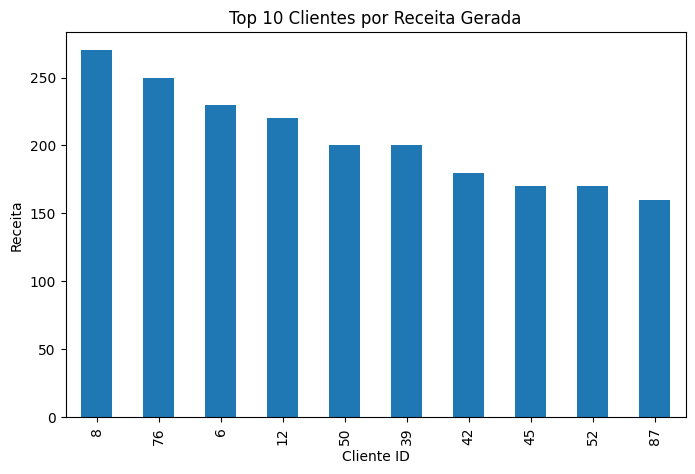

In [7]:
# Faturamento gerado por cada cliente
df['revenue'] = df['quantity'] * df['unit_price']
revenue_per_client = df.groupby('cliente_id')['revenue'].sum().sort_values(ascending=False).head(10)

# Gráfico com o faturamento gerado por cliente
plt.figure(figsize=(8, 5))
revenue_per_client.plot(kind='bar')
plt.title('Top 10 Clientes por Receita Gerada')
plt.xlabel('Cliente ID')
plt.ylabel('Receita')
plt.show()

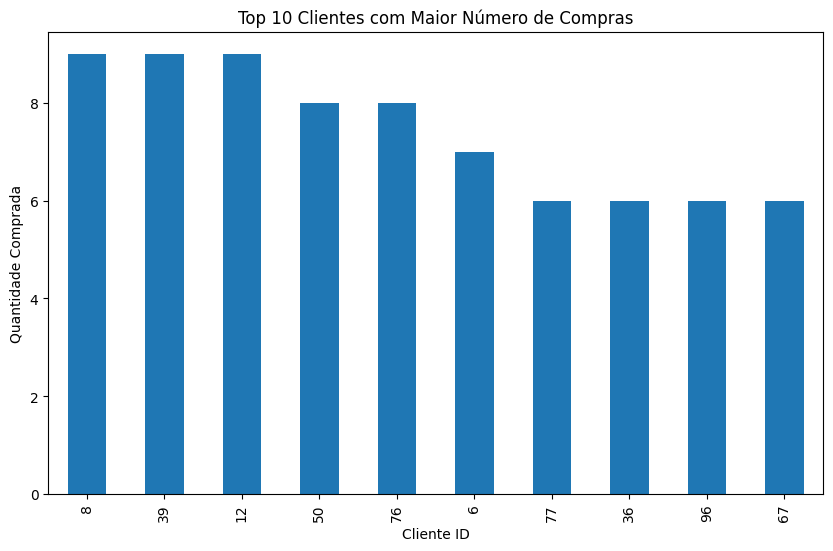

In [8]:
# Cliente com maior número de compras
top_clients = df.groupby('cliente_id')['quantity'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras com os clientes que tem o maior número de compras
plt.figure(figsize=(10, 6))
top_clients.plot(kind='bar')
plt.title('Top 10 Clientes com Maior Número de Compras')
plt.xlabel('Cliente ID')
plt.ylabel('Quantidade Comprada')
plt.show()